<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/piercel_week1_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Pierce Lopez <br>
**Date Created**: August 10, 2020 <br>
**Last Updated**: August 10, 2020 <br> 
**Description**: Contains some applications of Week 1 lessons on the Customs dataset. 

In [ ]:
# mount drive
from google.colab import drive
drive.mount("/content/drive")

*Manually added NIP-Data-Computation-Group-Drive shortcut to My Drive*


In [7]:
# check if the directories and files exist in My Drive
!ls drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

boc_lite_2012_2019_top9_hscode.csv  boc_lite_2014.csv  boc_lite_2017.csv
boc_lite_2012.csv		    boc_lite_2015.csv  boc_lite_2018.csv
boc_lite_2013.csv		    boc_lite_2016.csv  boc_lite_2019.csv


_Note: One can opt to change current work directory by using the shell command **%cd**!_ 

In [8]:
%cd drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

/content/drive/.shortcut-targets-by-id/1pfxnf06OodnUo3H4NgkxVN6pA2FI9hh_/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv


_Check location of current directory_

In [10]:
%pwd

'/content/drive/.shortcut-targets-by-id/1pfxnf06OodnUo3H4NgkxVN6pA2FI9hh_/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv'

## Plans to do:

1. Import modules
2. Read a .csv file
3. Know information regarding a dataset (i.e. columns, row values)
4. Select columns
5. Filter rows using logic
6. Filter columns using logic
7. Read several .csv files using a `for` loop
8. Collect certain data from each .csv file and store it in a new DataFrame
9. Plot the collected data

_1. Import modules_

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

_2. Read a .csv file_

In [ ]:
# store data in a pandas DataFrame
df = pd.read_csv('boc_lite_2014.csv', encoding = "ISO-8859-1")

_3. Know information regarding a dataset (i.e. columns, row values)_

In [ ]:
# display information about the DataFrame
print(df.info())

# display first few rows of the DataFrame
print(df.head())

_4. Select columns_

In [ ]:
exc_rate = df[['countryorigin_iso3', 'exchangerate']]
print(exc_rate)

_5. Filter rows using logic_

In [ ]:
filter = df['countryorigin_iso3'] == 'NZL'

_6. Filter columns using logic_

In [ ]:
exc_rate_nzl = df[filter][['exchangerate']]
print(exc_rate_nzl)

_7. Read several .csv files using a `for` loop_ <br>
_8. Collect certain data from each .csv file and store it in a new DataFrame_

In [150]:
# initialize
import_list_nzl = []
import_list_aus = []
import_list_chn = []
year_list = []

for i in range(2,10) :
  # store unique filenames
  filename = 'boc_lite_201' + str(i) + '.csv'

  # read csv files
  df = pd.read_csv(filename, encoding = "ISO-8859-1", index_col = False)

  # filter rows
  filter_nzl = df['countryorigin_iso3'] == 'NZL'
  filter_aus = df['countryorigin_iso3'] == 'AUS'
  filter_chn = df['countryorigin_iso3'] == 'CHN'

  # select column using filter
  import_nzl = df[filter_nzl][['countryorigin_iso3']]
  import_aus = df[filter_aus][['countryorigin_iso3']]
  import_chn = df[filter_chn][['countryorigin_iso3']]

  import_count_nzl = import_nzl.shape[0]
  import_count_aus = import_aus.shape[0]
  import_count_chn = import_chn.shape[0]

  # append value to list
  import_list_nzl.append(import_count_nzl)
  import_list_aus.append(import_count_aus)
  import_list_chn.append(import_count_chn)
  year_list.append(2010 + i)

  # clear RAM
  gc.collect()

# generate DataFrame
dat = pd.DataFrame({'import_nzl':import_list_nzl, 'import_aus':import_list_aus, 
                    'import_chn':import_list_chn, 'year':year_list})

# display DataFrame
print(dat)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   import_nzl  import_aus  import_chn  year
0        4886       18043      327575  2012
1        5264       17742      349020  2013
2        5313       20483      447574  2014
3        5598       22107      589626  2015
4        6096       27383      812537  2016
5        6269       28355      943549  2017
6        6041       27937     1038995  2018
7        5950       28081     1055807  2019


_10. Plot the collected data_

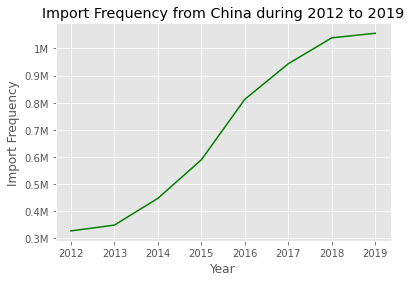

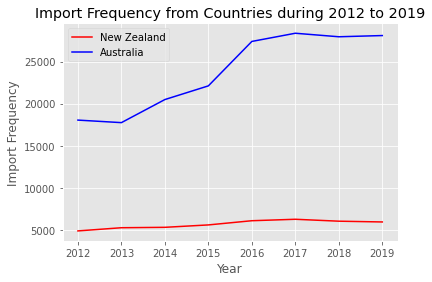

In [158]:
# generate separate plot
plt.plot(dat['year'], dat['import_chn'], color = 'green')

# add labels
plt.title('Import Frequency from China during 2012 to 2019')
plt.xlabel('Year')
plt.ylabel('Import Frequency')

# change y-axis ticks
plt.yticks([300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], 
           ['0.3M', '0.4M', '0.5M', '0.6M', '0.7M', '0.8M', '0.9M', '1M', ])

# display plot
plt.show()

# select plot style
plt.style.use('ggplot')

# generate line plots (on one plane)
plt.plot(dat['year'], dat['import_nzl'], label = 'New Zealand', color = 'red')
plt.plot(dat['year'], dat['import_aus'], label = 'Australia', color = 'blue')

# add labels
plt.title('Import Frequency from Countries during 2012 to 2019')
plt.xlabel('Year')
plt.ylabel('Import Frequency')
plt.legend()

# display plots
plt.show()